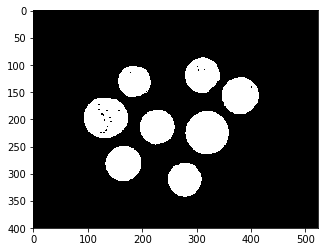

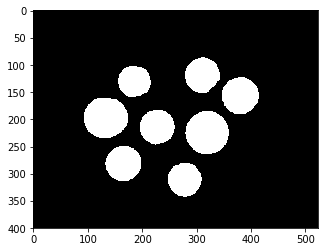

8
2944.5
Area of contour 0  is  2944.5
3256.0
Area of contour 1  is  3256.0
4854.0
Area of contour 2  is  4854.0
3118.0
Area of contour 3  is  3118.0
4665.0
Area of contour 4  is  4665.0
3537.0
Area of contour 5  is  3537.0
2653.5
Area of contour 6  is  2653.5
3116.5
Area of contour 7  is  3116.5
8


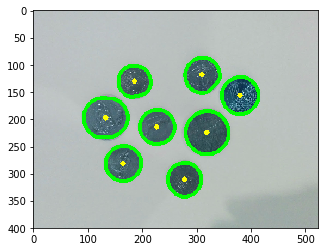

(400, 524, 3)
(400, 524, 3)


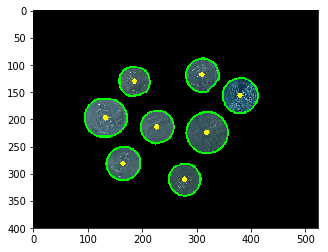

In [3]:

import cv2
import matplotlib.pyplot as plt
import sys
import numpy as np

# read the image
image = cv2.imread('coins.jpg')

# convert to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_rgb = cv2.resize(image,None,fx=0.5, fy=0.5, interpolation = cv2.INTER_CUBIC)
# convert to grayscale
gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

gray = cv2.GaussianBlur(gray,(5,5),0)
# create a binary thresholded image
_, binary = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY_INV)
#ret, binary = cv2.threshold(gray,100,255,0)
# show it
plt.imshow(binary, cmap="gray")
plt.show()

kernel = np.ones((7,7), np.uint8)
closing = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel) #inside noise
plt.imshow(closing, cmap="gray")
plt.show()
#img_canny = cv2.Canny(closing,100,200)
#plt.imshow(img_canny, cmap="gray")
#plt.show()
# find the contours from the thresholded image
contours, hierarchy = cv2.findContours(closing, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)



print(len(contours))

#print(contours)

# show the image with the drawn contours
#iterate through contours list
count=0
for c in contours:
    area = cv2.contourArea(c)
    print(area)
    if area > 3 and area < 5000 :
        M = cv2.moments(c)
        #print(M)
        cX = int(M['m10']/M['m00'])
        cY = int(M['m01']/M['m00'])
        hull = cv2.convexHull(c)
        cv2.circle(image_rgb, (cX, cY), 2, (255, 255, 0), 5)
        cv2.drawContours(image_rgb, [hull], 0, (0, 255, 0), 5)
        #area = cv2.contourArea(c)
        print('Area of contour', count, ' is ',area)
        count+=1

print(count)
plt.imshow(image_rgb)
plt.show()
closing = cv2.cvtColor(closing, cv2.COLOR_BGR2RGB)

print(image_rgb.shape)
print(closing.shape)
dst = cv2.bitwise_and(image_rgb, closing)
plt.imshow(dst)
plt.show()
rows = gray.shape[0]

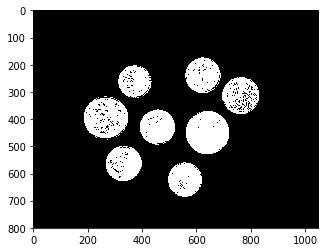

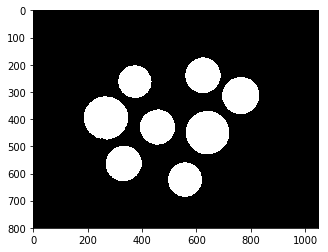

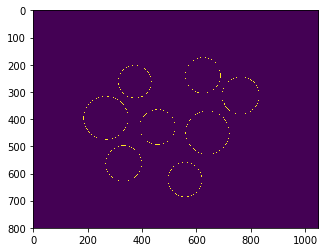

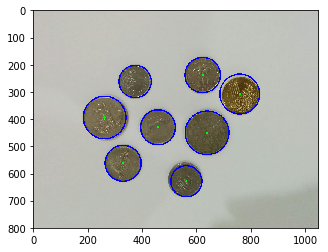

In [82]:
#houghcircles
import cv2
from matplotlib import pyplot as plt
import numpy as np

im = cv2.imread('coins.jpg')
#im = cv2.resize(im,None,fx=0.2, fy=0.2, interpolation = cv2.INTER_CUBIC)
gray= cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
#gray = cv2.GaussianBlur(gray,(5,5),sigmaX=2,sigmaY=2)
_, binary = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY_INV)
#ret, binary = cv2.threshold(gray,100,255,0)
# show it
plt.imshow(binary, cmap="gray")
plt.show()

kernel = np.ones((7,7), np.uint8)
closing = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel) #inside noise
plt.imshow(closing, cmap="gray")
plt.show()
img_canny = cv2.Canny(closing,100,255)
plt.imshow(img_canny)
plt.show()

rows = gray.shape[0]
#circles = cv2.HoughCircles(img_canny, cv2.HOUGH_GRADIENT, 1.2, 100)

circles = cv2.HoughCircles(img_canny, cv2.HOUGH_GRADIENT, 1, rows / 8,
                               param1=50, param2=30,
                               minRadius=10, maxRadius=300)
if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            center = (i[0], i[1])
            # circle center
            cv2.circle(im, center, 1, (0, 255,0), 6)
            #cv2.circle(im,(i[0],i[1]),2,(0,255,0),6)
            # circle outline
            radius = i[2]
            #circle
            cv2.circle(im, center, radius, (255, 0, 0), 3)


im_rgb= cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.imshow(im_rgb)
plt.show()

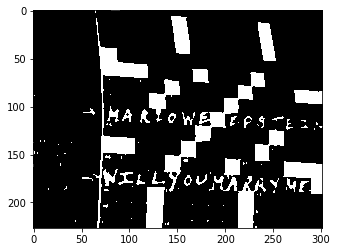

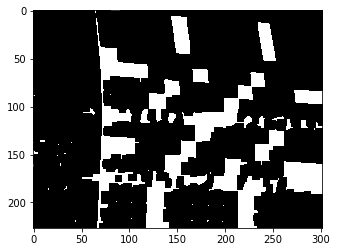

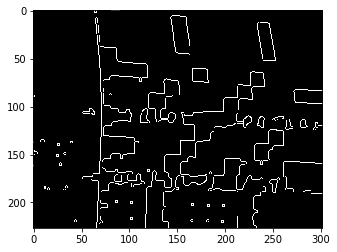

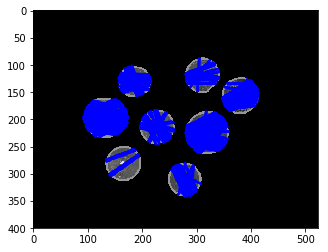

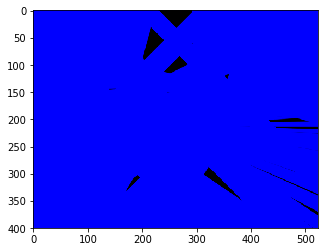

In [92]:
#houglines

import cv2
import matplotlib.pyplot as plt
import sys
import numpy as np
import math

# read the image
image = cv2.imread('creative-proposal.jpg')

# convert to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_rgb = cv2.resize(image,None,fx=0.5, fy=0.5, interpolation = cv2.INTER_CUBIC)
# convert to grayscale
gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

gray = cv2.GaussianBlur(gray,(5,5),0)
# create a binary thresholded image
_, binary = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY_INV)
#ret, binary = cv2.threshold(gray,100,255,0)
# show it
plt.imshow(binary, cmap="gray")
plt.show()

kernel = np.ones((7,7), np.uint8)
closing = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel) #inside noise
plt.imshow(closing, cmap="gray")
plt.show()

img_canny = cv2.Canny(closing,50,200, None, 3)
plt.imshow(img_canny, cmap="gray")
plt.show()
img_canny = cv2.cvtColor(dst, cv2.COLOR_RGB2GRAY)
# Copy edges to the images that will display the results in BGR
cdst = cv2.cvtColor(img_canny, cv2.COLOR_GRAY2BGR)
cdstP = np.copy(cdst)

lines = cv2.HoughLines(img_canny, 1, np.pi / 180, 150, None, 0, 0)

if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv2.line(cdst, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)

linesP = cv2.HoughLinesP(img_canny, 1, np.pi / 180, 50, None, 50, 10)

if linesP is not None:
    for i in range(0, len(linesP)):
        l = linesP[i][0]
        cv2.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv2.LINE_AA)

plt.imshow(cdstP)
plt.show()
plt.imshow(cdst)
plt.show()

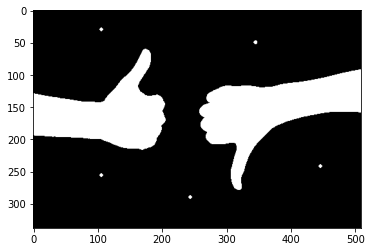

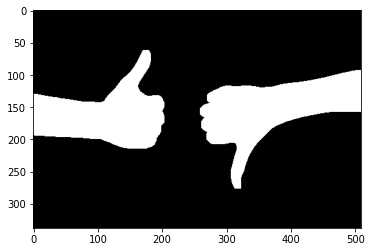

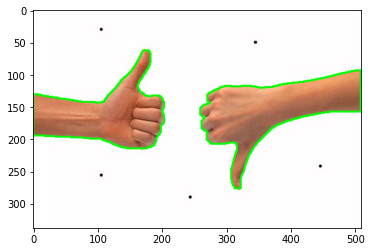

In [4]:

import cv2
import matplotlib.pyplot as plt
import numpy as np
import sys

# read the image
image = cv2.imread('noise_out_thumbs_up_down.jpg')

# convert to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# create a binary thresholded image
_, binary = cv2.threshold(gray, 220, 255, cv2.THRESH_BINARY_INV)
# show it
plt.imshow(binary, cmap="gray")
plt.show()

kernel = np.ones((9,9),np.uint8)
closing = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)
plt.imshow(closing, cmap="gray")
plt.show()

# find the contours from the thresholded image
contours, hierarchy = cv2.findContours(closing, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# draw all contours
image = cv2.drawContours(image, contours, -1, (0, 255, 0), 2)

# show the image with the drawn contours
plt.imshow(image)
plt.show()


Iterating through contours and convex hull

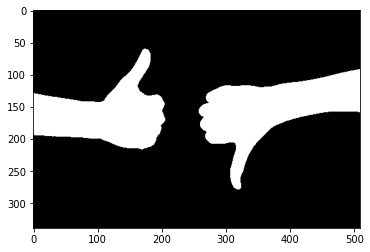

Number of contours:  2


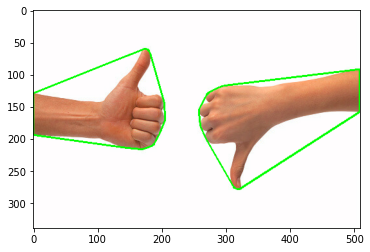

In [1]:
import cv2
import matplotlib.pyplot as plt
import sys

# read the image
image = cv2.imread('thumbs_up_down.jpg')

# convert to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# create a binary thresholded image
_, binary = cv2.threshold(gray, 220, 255, cv2.THRESH_BINARY_INV)
# show it
plt.imshow(binary, cmap="gray")
plt.show()

# find the contours from the thresholded image
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#iterate through contours list
count=0
for c in contours:
    hull = cv2.convexHull(c)
    count += 1
    cv2.drawContours(image, [hull], 0, (0, 255, 0), 2)

print('Number of contours: ', count)
# show the image with the drawn contours
plt.imshow(image)
plt.show()

Contour features... centroid (using moments) and area

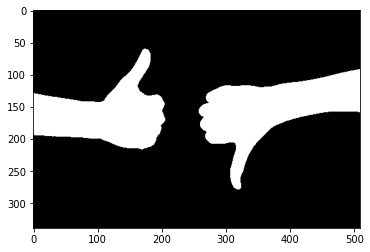

{'m00': 18114.0, 'm10': 6724175.666666666, 'm01': 2818404.1666666665, 'm20': 2583532831.6666665, 'm11': 1023079035.0833333, 'm02': 459819554.8333333, 'm30': 1026388791229.7001, 'm21': 383993078099.25, 'm12': 163204293802.98334, 'm03': 78901827392.75, 'mu20': 87422729.19387722, 'mu11': -23152869.318341732, 'mu02': 21296752.21193403, 'mu30': 2439350054.6120605, 'mu21': -796133368.2144432, 'mu12': -282466435.1524792, 'mu03': 730078491.4447632, 'nu20': 0.26643767393834494, 'nu11': -0.07056284679121509, 'nu02': 0.064905970954135, 'nu30': 0.055238034751073646, 'nu21': -0.018028098335772697, 'nu12': -0.006396331158565893, 'nu03': 0.0165323140092949}
Area of contour 0  is  18114.0
{'m00': 15348.5, 'm10': 1726887.6666666665, 'm01': 2470644.0, 'm20': 244534643.5833333, 'm11': 273979062.375, 'm02': 410972494.5833333, 'm30': 37673610975.6, 'm21': 38444656069.95, 'm12': 45354414246.61667, 'm03': 70097686458.1, 'mu20': 50239369.564019114, 'mu11': -3997590.2180220485, 'mu02': 13273581.025917351, 'mu3

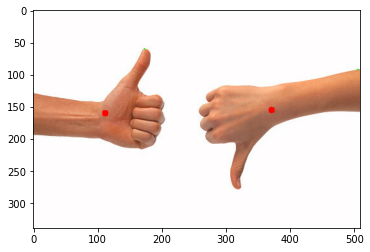

In [2]:
import cv2
import matplotlib.pyplot as plt
import sys

# read the image
image = cv2.imread('thumbs_up_down.jpg')

# convert to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# create a binary thresholded image
_, binary = cv2.threshold(gray, 220, 255, cv2.THRESH_BINARY_INV)
# show it
plt.imshow(binary, cmap="gray")
plt.show()

# find the contours from the thresholded image
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#iterate through contours list
count=0
for c in contours:
    M = cv2.moments(c)
    print(M)
    cX = int(M['m10']/M['m00'])
    cY = int(M['m01']/M['m00'])
    cv2.circle(image, (cX, cY), 5, (255, 0, 0), -1)
    cv2.drawContours(image, c, 0, (0, 255, 0), 2)
    area = cv2.contourArea(c)
    print('Area of contour', count, ' is ',area)
    count+=1

# show the image with the drawn contours
plt.imshow(image)
plt.show()

In [5]:

import cv2
import matplotlib.pyplot as plt
import sys
import numpy as np

# read the image
image = cv2.imread('.jpg')

# convert to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_rgb = cv2.resize(image,None,fx=0.5, fy=0.5, interpolation = cv2.INTER_CUBIC)
# convert to grayscale
gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

gray = cv2.GaussianBlur(gray,(5,5),0)
# create a binary thresholded image
_, binary = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY_INV)
#ret, binary = cv2.threshold(gray,100,255,0)
# show it
plt.imshow(binary, cmap="gray")
plt.show()

kernel = np.ones((7,7), np.uint8)
closing = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel) #inside noise
plt.imshow(closing, cmap="gray")
plt.show()
#img_canny = cv2.Canny(closing,100,200)
#plt.imshow(img_canny, cmap="gray")
#plt.show()
# find the contours from the thresholded image
contours, hierarchy = cv2.findContours(closing, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)



print(len(contours))

#print(contours)

# show the image with the drawn contours
#iterate through contours list
count=0
for c in contours:
    area = cv2.contourArea(c)
    print(area)
    if area > 3 and area < 5000 :
        M = cv2.moments(c)
        #print(M)
        cX = int(M['m10']/M['m00'])
        cY = int(M['m01']/M['m00'])
        hull = cv2.convexHull(c)
        cv2.circle(image_rgb, (cX, cY), 2, (255, 255, 0), 5)
        cv2.drawContours(image_rgb, [hull], 0, (0, 255, 0), 5)
        #area = cv2.contourArea(c)
        print('Area of contour', count, ' is ',area)
        count+=1

print(count)
plt.imshow(image_rgb)
plt.show()
closing = cv2.cvtColor(closing, cv2.COLOR_BGR2RGB)

print(image_rgb.shape)
print(closing.shape)
dst = cv2.bitwise_and(image_rgb, closing)
plt.imshow(dst)
plt.show()
rows = gray.shape[0]

error: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-10658tfl\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'
